In [1]:
import pandas as pd
# 计算样本熵的包
from sampen import sampen2
import numpy as np
import empyrical as ep

In [2]:
def sample_entropy(time_series):
    signal = time_series.tolist()
    
    # 计算样本熵
    try:
        sampen_result = sampen2(signal)
        return sampen_result[1][1]
    except ZeroDivisionError:
        # 处理分母为零的情况，可以返回默认值或采取其他适当的处理方式
        return 0.0

In [3]:
# 定义择时策略函数
def timing_strategy(data, threshold, slope_window1, slope_window2, ma_windows):
    # 计算上证指数的样本熵序列
    data['SampleEntropy'] = data['close'].rolling(window=144).apply(lambda x: sample_entropy(x))

    # 计算样本熵序列的斜率
    data['EntropySlope1'] = data['SampleEntropy'].diff(slope_window1)
    data['EntropySlope2'] = data['SampleEntropy'].diff(slope_window2)

    # 计算均线
    for ma_window in ma_windows:
        data[f'MA_{ma_window}'] = data['SampleEntropy'].rolling(window=ma_window).mean()

    data = data.dropna()

    # 设定择时规则1，斜率参数55
    data.loc[(data['SampleEntropy'] < -threshold), 'signal'] = 0  # 潜在卖出信号
    data.loc[(data['SampleEntropy'] > threshold), 'signal'] = 1  # 潜在买入信号
    
    return data

In [4]:
univ01 = ['AG', 'AL', 'NI', 'ZN',
        'RB', 'HC', 'I', 'J', 'JM', 'FG',
        'BU', 'L', 'MA', 'PP', 'RU', 'V', 'TA', 'FU', 'EG', 'SP',
        'A', 'M', 'P', 'OI', 'Y', 'SR', 'CF', 'C', 'RM']

univ02 = ['AG', 'AL', 'NI', 'ZN',
            'RB', 'HC', 'I', 'J', 'JM', 'FG',
            'BU', 'L', 'MA', 'PP', 'RU', 'V', 'TA', 'FU', 'EG', 'SP',
            'A', 'M', 'P', 'OI', 'Y', 'SR', 'CF', 'C', 'RM','CU','PB','SN','SF','SM','AP','SA']

univ_nonferrous = ['CU','AL','NI','ZN','PB','SN']
univ_black = ['RB','I','HC','J','JM','FG','SF','SM','SA']
univ_chemic = ['FU','BU','RU','L','TA','V','EG','MA','PP']
univ_agri = ['A','AP','C', 'CF', 'CS', 'JD', 'M', 'OI', 'P', 'RM', 'SR', 'Y']
univ_precious = ['AU','AG']

In [5]:
#行情数据
sec_post_1d_df = pd.read_pickle(r'/Users/tiancaixiaohuoban/Desktop/实习/买方实习/中信建投期货（金融工程）/策略设计/dom_cont_post_1d')
sec_post_1d_df

date           2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
A  open          1.005669    1.002465    1.002218    1.026621    0.995810   
   high          1.008134    1.006162    1.033769    1.032290    0.998275   
   low           0.998028    1.000739    1.000000    0.979788    0.972886   
   close         1.000000    1.002218    1.023909    0.996796    0.981267   
   pct_change    0.000000    0.002218    0.021643   -0.026481   -0.015579   
...                   ...         ...         ...         ...         ...   
ZN close         1.000000    1.010030    1.014229    1.013529    0.989503   
   pct_change    0.000000    0.010030    0.004157   -0.000690   -0.023705   
   volume       37.920800   47.084800   41.559400   52.049800   61.431800   
   amount      407.794507  506.244472  452.561184  572.035483  653.285836   
   oi           15.971200   16.802000   16.154400   14.698600   14.068000   

date           2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
A  open          0.988908    0.985950    0.962534    0.971900    0.962534   
   high          0.998275    0.993098    0.970668    0.971900    0.973379   
   low           0.988908    0.981267    0.960316    0.965738    0.961794   
   close         0.993591    0.986936    0.963520    0.965985    0.964999   
   pct_change    0.012560   -0.006698   -0.023726    0.002558   -0.001021   
...                   ...         ...         ...         ...         ...   
ZN close         1.013996    1.002566    0.954047    0.961512    0.954980   
   pct_change    0.024752   -0.011272   -0.048395    0.007824   -0.006793   
   volume       37.344600   44.854800   36.039000   36.066600   41.209200   
   amount      403.436882  479.215884  371.271720  373.466084  423.367735   
   oi           13.573800   14.719000   13.454000   14.202400   13.316600   

date           ...  2024-01-12  2024-01-15  2024-01-16  2024-01-17  \
A  open        ...    1.119819    1.115857    1.117489    1.122616   
   high        ...    1.120052    1.117722    1.126811    1.128675   
   low         ...    1.111196    1.106535    1.112129    1.117023   
   close       ...    1.113061    1.115158    1.122616    1.118887   
   pct_change  ...   -0.006242    0.001884    0.006688   -0.003322   
...            ...         ...         ...         ...         ...   
ZN close       ...    1.149238    1.154132    1.151685    1.147605   
   pct_change  ...   -0.003771    0.004258   -0.002120   -0.003542   
   volume      ...    6.810800    9.279400    6.821800    8.139200   
   amount      ...   71.975769   97.981510   72.638088   86.283250   
   oi          ...    5.942900    5.315600    4.716700    8.297100   

date           2024-01-18  2024-01-19  2024-01-22  2024-01-23  2024-01-24  \
A  open          1.117722    1.114459    1.115158    1.111429    1.118654   
   high          1.119353    1.118188    1.115857    1.118887    1.124947   
   low           1.108633    1.110264    1.109565    1.107468    1.114692   
   close         1.112595    1.113993    1.111429    1.116557    1.121684   
   pct_change   -0.005624    0.001257   -0.002301    0.004613    0.004592   
...                   ...         ...         ...         ...         ...   
ZN close         1.129657    1.124490    1.125034    1.135912    1.155764   
   pct_change   -0.015640   -0.004574    0.000484    0.009669    0.017477   
   volume       13.373300    9.271600    8.455000    9.264500   12.441900   
   amount      139.483184   96.035770   87.723255   96.273565  131.348779   
   oi            8.969500    9.068100    8.966600    8.976100    8.534000   

date           2024-01-25  
A  open          1.121684  
   high          1.123315  
   low           1.112362  
   close         1.112595  
   pct_change   -0.008103  
...                   ...  
ZN close         1.162290  
   pct_change    0.005647  
   volume       10.244300  
   amount      109.345189  
   oi            8.951800  

[496 rows x 3419 columns]

In [6]:
df = sec_post_1d_df.loc['A'].T
df

,open,high,low,close,pct_change,volume,amount,oi
date,,,,,,,,
2010-01-04,1.005669,1.008134,0.998028,1.000000,0.000000,32.1838,130.957566,28.4296
2010-01-05,1.002465,1.006162,1.000739,1.002218,0.002218,25.3640,103.241520,28.3384
2010-01-06,1.002218,1.033769,1.000000,1.023909,0.021643,86.0812,356.424302,35.2830
2010-01-07,1.026621,1.032290,0.979788,0.996796,-0.026481,70.5704,288.637946,29.7236
2010-01-08,0.995810,0.998275,0.972886,0.981267,-0.015579,52.6594,210.649263,27.0074
...,...,...,...,...,...,...,...,...
2024-01-19,1.114459,1.118188,1.110264,1.113993,0.001257,5.3482,25.570559,17.0128
2024-01-22,1.115158,1.115857,1.109565,1.111429,-0.002301,6.1366,29.291006,17.4867
2024-01-23,1.111429,1.118887,1.107468,1.116557,0.004613,6.4650,30.880138,17.2050


In [7]:
threshold = 0.2 #研报里面选择的阈值设定
slope_window1 = 55  # 样本熵序列的斜率参数1
slope_window2 = 89  # 样本熵序列的斜率参数2
ma_windows = [5, 10, 20, 30, 40, 50]  # 行情序列的均线参数

In [8]:
# 样本熵
def generate_signal_for_df1(df,threshold,slope_window1,slope_window2,ma_windows):
    short_term =13
    long_term = 33
    
    #计算短周期的moving average
    #计算长周期的moving average
    df['SMA1'] = df.close.rolling(short_term).mean()
    df['SMA2'] = df.close.rolling(long_term).mean()

    # 构造基础交易信号
    # 当长期均线低于短期均线时，标记为潜在进场时机，即1.0，否则为0
    df['signal'] = np.where(df['SMA1'] > df['SMA2'], 1.0, 0.0)
    
    # 执行择时策略
    result = timing_strategy(df, threshold, slope_window1, slope_window2, ma_windows)

    for i in range(1,len(result)):
        row_index = result.index[i]
        row_index_last = result.index[i-1]
    #     # 样本熵标记变盘点，55
    #     # 样本熵出现下降趋势，且长期均线居于短期均线之下，市场行情明朗，且有上行趋势，说明应该买入
    #     if (result.loc[row_index,'EntropySlope1'] <= 0) and (result.loc[row_index_last,'signal'] == 1):
    #          result.loc[row_index,'Signal'] = 1
    #     # 样本熵出现上升趋势，且长期均线居于短期均线之上，市场行情复杂，且有下行趋势，说明应该卖出
    #     if (result.loc[row_index,'EntropySlope1'] > 0) and (result.loc[row_index_last,'signal'] == 0):
    #          result.loc[row_index,'Signal'] = -1
        # 样本熵标记变盘点，89
        # 样本熵出现下降趋势，且长期均线居于短期均线之下，市场行情明朗，且有上行趋势，说明应该买入
        if (result.loc[row_index,'EntropySlope2'] <= 0) and (result.loc[row_index_last,'signal'] == 1):
             result.loc[row_index,'Signal'] = 1
        # 样本熵出现上升趋势，且长期均线居于短期均线之上，市场行情复杂，且有下行趋势，说明应该卖出
        if (result.loc[row_index,'EntropySlope2'] > 0) and (result.loc[row_index_last,'signal'] == 0):
             result.loc[row_index,'Signal'] = -1
    result['Signal'] = result['Signal'].fillna(0)
    return result['Signal']

In [9]:
# 双均线
def generate_signal_for_df2(df):
    short_term =13
    long_term = 33
    
    #计算短周期的moving average
    #计算长周期的moving average
    df['SMA1'] = df.close.rolling(short_term).mean()
    df['SMA2'] = df.close.rolling(long_term).mean()

    # 构造基础交易信号
    # 当长期均线低于短期均线时，标记为潜在进场时机，即1.0，否则为0
    df['signal'] = np.where(df['SMA1'] > df['SMA2'], 1.0, 0.0)

    result = df

    for i in range(1,len(result)):
        row_index = result.index[i]
        row_index_last = result.index[i-1]
        # 普通的双均线策略   
        if (result.loc[row_index,'signal'] ==0) and (result.loc[row_index_last,'signal'] ==0):
            result.loc[row_index,'Signal'] = 0
        if (result.loc[row_index,'signal'] ==1) and (result.loc[row_index_last,'signal'] ==1):
            result.loc[row_index,'Signal'] = 0
        if (result.loc[row_index,'signal'] ==1) and (result.loc[row_index_last,'signal'] ==0):
            result.loc[row_index,'Signal'] = -1
        if (result.loc[row_index,'signal'] ==0) and (result.loc[row_index_last,'signal'] ==1):
            result.loc[row_index,'Signal'] = 1
    result['Signal'] = result['Signal'].fillna(0)
    return result['Signal']

In [10]:
# test
# signal = generate_signal_for_df(df,threshold,slope_window1,slope_window2,ma_windows)

In [11]:
# signal.describe()

In [12]:
# 循环产生信号（样本熵）
for asset in univ01:
    print(asset)
    df = sec_post_1d_df.loc[asset].T
    if (asset=='AG'):
        test_signal_df1 = generate_signal_for_df1(df,threshold,slope_window1,slope_window2,ma_windows)
        continue
    # 产生信号
    signal = generate_signal_for_df1(df,threshold,slope_window1,slope_window2,ma_windows)
    test_signal_df1 = pd.concat([test_signal_df1, signal], axis=1)

AG


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


AL


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


NI


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


ZN


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


RB


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


HC


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


I


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


J


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


JM


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


FG


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


BU


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


L


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


MA


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


PP


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


RU


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


V


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


TA


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


FU


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


EG


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


SP


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


A


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


M


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


P


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


OI


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


Y


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


SR


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


CF


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


C


<ipython-input-8-c8edaea18d5e>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = -1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


RM


<ipython-input-8-c8edaea18d5e>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result.loc[row_index,'Signal'] = 1
<ipython-input-8-c8edaea18d5e>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Signal'] = result['Signal'].fillna(0)


In [13]:
# 循环产生信号（双均线）
for asset in univ01:
    print(asset)
    df = sec_post_1d_df.loc[asset].T
    if (asset=='AG'):
        test_signal_df2 = generate_signal_for_df2(df)
        continue
    # 产生信号
    signal = generate_signal_for_df2(df)
    test_signal_df2 = pd.concat([test_signal_df2, signal], axis=1)

AG
AL
NI
ZN
RB
HC
I
J
JM
FG
BU
L
MA
PP
RU
V
TA
FU
EG
SP
A
M
P
OI
Y
SR
CF
C
RM


In [14]:
test_signal_df1 = test_signal_df1.fillna(0)
test_signal_df2 = test_signal_df2.fillna(0)

In [15]:
test_signal_df1.columns = univ01
test_signal_df2.columns = univ01

In [16]:
test_signal_df1 = test_signal_df1.T
test_signal_df2 = test_signal_df2.T

In [17]:
# 样本熵
test_signal_df1

date,2010-12-20,2010-12-21,2010-12-22,2010-12-23,2010-12-24,2010-12-27,2010-12-28,2010-12-29,2010-12-30,2010-12-31,...,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-22,2024-01-23,2024-01-24,2024-01-25
AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
ZN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
RB,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0
JM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# 双均线
test_signal_df2

date,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,...,2024-01-12,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-22,2024-01-23,2024-01-24,2024-01-25
AG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
RB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
I,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
JM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
test_sig_df1 = test_signal_df1
test_sig_df2 = test_signal_df2

In [20]:
#收益率序列
pct_df1 = sec_post_1d_df.xs('close',level=1).pct_change(axis=1).reindex(test_sig_df1.index)
pct_df2 = sec_post_1d_df.xs('close',level=1).pct_change(axis=1).reindex(test_sig_df2.index)

In [21]:
#手续费
fee_df1 = abs(test_sig_df1.diff(axis=1).fillna(0))*1e-4 #单边万一的手续费
fee_df2 = abs(test_sig_df2.diff(axis=1).fillna(0))*1e-4 #单边万一的手续费

In [22]:
#当天的信号作用到第二天，用close计算出来的收益率，shift-1.  
pnl_seires1 = ((pct_df1.shift(-1,axis=1).fillna(0)*test_sig_df1-fee_df1).mean()+1).cumprod()
pnl_seires2 = ((pct_df2.shift(-1,axis=1).fillna(0)*test_sig_df2-fee_df2).mean()+1).cumprod()

<AxesSubplot:xlabel='date'>

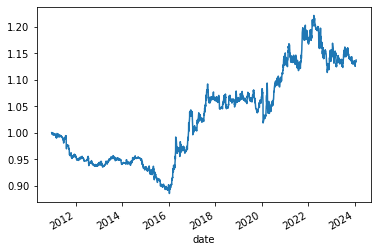

In [23]:
pnl_seires1.plot()

<AxesSubplot:xlabel='date'>

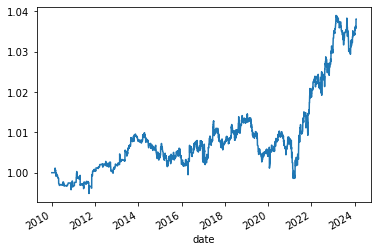

In [24]:
pnl_seires2.plot()

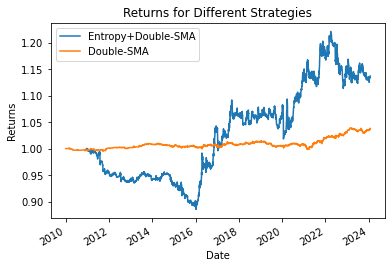

In [31]:
import matplotlib.pyplot as plt

# 创建一个绘图对象
ax = pnl_seires1.plot(label='Entropy+Double-SMA')

# 绘制第二个Series
pnl_seires2.plot(ax=ax, label='Double-SMA')

# 添加标题和标签
plt.title('Returns for Different Strategies')
plt.xlabel('Date')
plt.ylabel('Returns')

# 添加图例
plt.legend()

# 显示图形
plt.show()

In [22]:
return_df1 = (pct_df1.shift(-1,axis=1).fillna(0)*test_sig_df1-fee_df1).mean()
#通过Empyrical 计算夏普等绩效指标。无风险利率取0% 
total_return = ep.cum_returns_final(return_df1)
annualized_return = ep.annual_return(return_df1)
max_drawdown = ep.max_drawdown(return_df1)
sharpe_ratio = ep.sharpe_ratio(return_df1)
# Print performance metrics
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Total Return: 3.81%
Annualized Return: 0.28%
Max Drawdown: -1.57%
Sharpe Ratio: 0.3673


In [ ]:
return_df2= (pct_df2.shift(-1,axis=1).fillna(0)*test_sig_df2-fee_df2).mean()
#通过Empyrical 计算夏普等绩效指标。无风险利率取0% 
total_return = ep.cum_returns_final(return_df2)
annualized_return = ep.annual_return(return_df2)
max_drawdown = ep.max_drawdown(return_df2)
sharpe_ratio = ep.sharpe_ratio(return_df2)
# Print performance metrics
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

In [23]:
test_signal_df = test_signal_df.T
test_signal_df.describe()

,AG,AL,NI,ZN,RB,HC,I,J,JM,FG,...,SP,A,M,P,OI,Y,SR,CF,C,RM
count,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.00000,3419.000000,3419.000000,3419.000000,...,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000,3419.000000
mean,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000292,0.000000,0.000000,0.000292,0.000292,0.000000,0.000000
std,0.176103,0.149115,0.141048,0.185804,0.171046,0.134682,0.14714,0.165836,0.152989,0.164062,...,0.110851,0.185804,0.176103,0.178577,0.165836,0.185804,0.186589,0.155830,0.151064,0.174434
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
